# Mini Batch GD

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from torch.utils.data import Dataset, DataLoader

In [2]:
#Add a class plot_error_surfaces to visualize the data space and parameters.
class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [3]:
#Creating random data
torch.manual_seed(1)

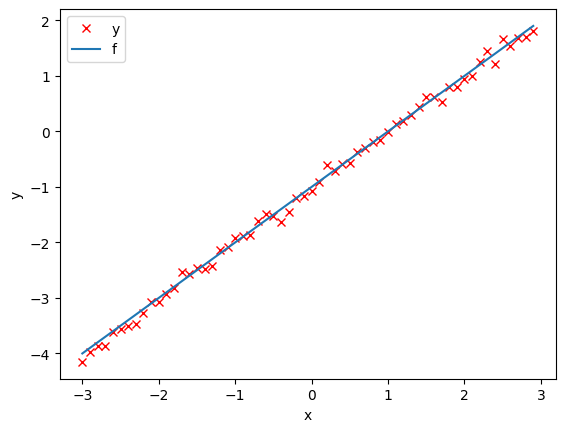

In [4]:
#Generating values
X = torch.arange(-3, 3, 0.1).view(-1, 1) #X -3 to 3 with 0.1 steps
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size()) #Adding random noise 

#Lets plot Y, X, f
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
# Define the forward function
def forward(x):
    return w * x + b

# Define the MSE Loss function
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2) #Mean Squared Error 

In [6]:
#We use plot_error_surfaces to visualize
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [7]:
#Dataset Creation Class
class Data(Dataset):
    #Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
        
    #Getter
    def __getitem__(self,index):    
        return self.x[index], self.y[index]
    
    #Return the length
    def __len__(self):
        return self.len

In [8]:
#Create a Dataset object
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 5) #Selecting a batch size of 5. 
print("The length of dataset: ", len(dataset)) #Using the len method in the Data class

# Define the parameters w, b for y = wx + b
w = torch.tensor(-15.0, requires_grad = True) #Requires_grad = true because torch needs to learn it.
b = torch.tensor(-10.0, requires_grad = True) #Requires_grad = true because torch needs to learn it.

The length of dataset:  60


In [9]:
#Define a learning rate and create an empty list LOSS to store the loss for each iteration
lr = 0.1 #Our first choice learning rate
LOSS_MINI5 = []  #Create the MiniBatch Loss empty list

def train_model_Mini5(epochs):
    
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI5.append(criterion(forward(X), Y).tolist())
       
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

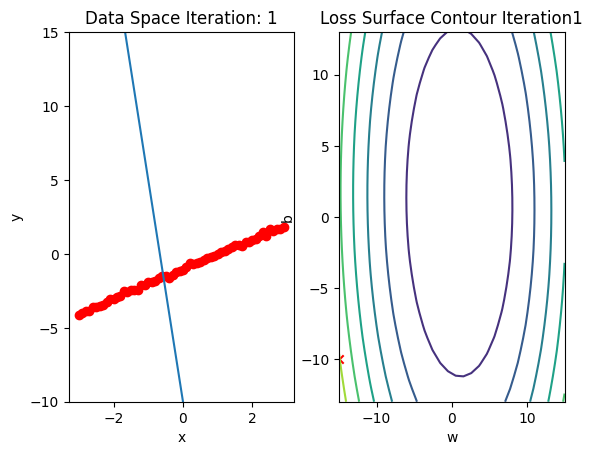

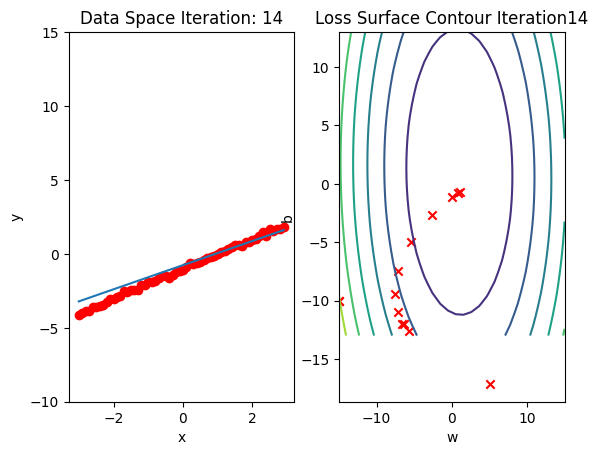

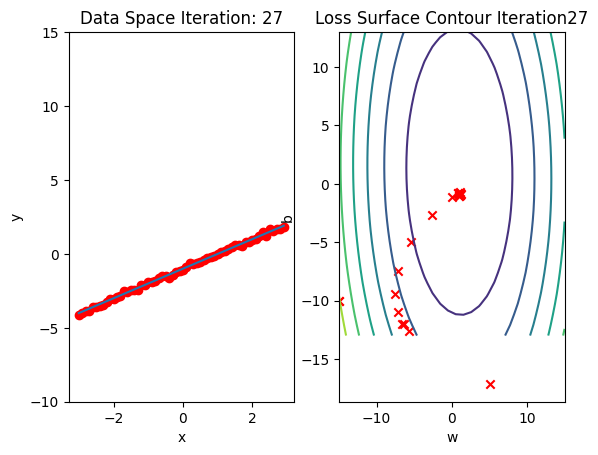

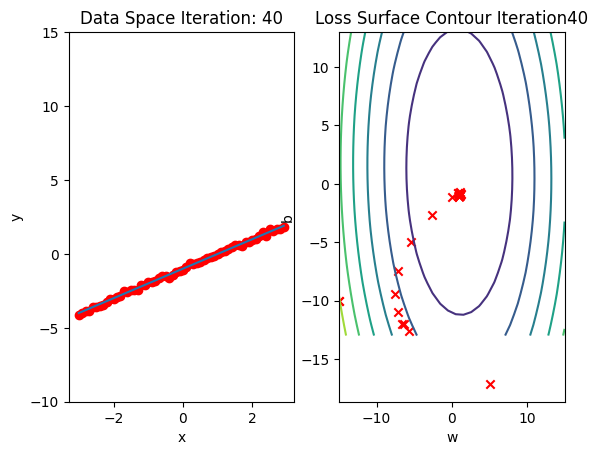

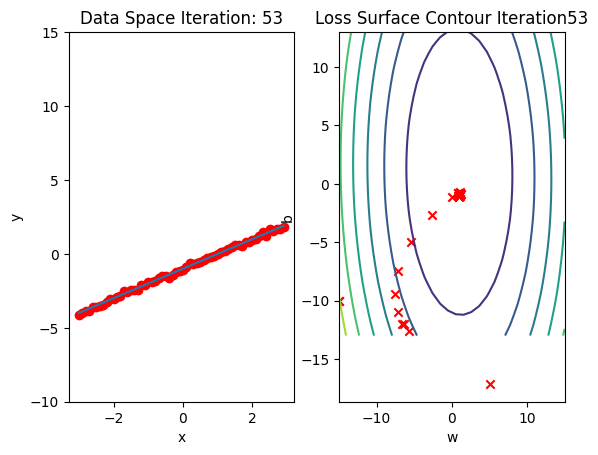

In [10]:
train_model_Mini5(5)

In [11]:
#Create a Dataset object
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10) #This time we change batch size to 10
print("The length of dataset: ", len(dataset)) #Using the len method in the Data class

The length of dataset:  60


In [12]:
# Define the parameters w, b for y = wx + b
w = torch.tensor(-15.0, requires_grad = True) #Requires_grad = true because torch needs to learn it.
b = torch.tensor(-10.0, requires_grad = True) #Requires_grad = true because torch needs to learn it.

In [13]:
#Define a learning rate and create an empty list LOSS to store the loss for each iteration
lr = 0.1 #Our first choice learning rate
LOSS_MINI10 = []  #Create the MiniBatch Loss empty list

def train_model_Mini10(epochs):
    
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI10.append(criterion(forward(X), Y).tolist())
       
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

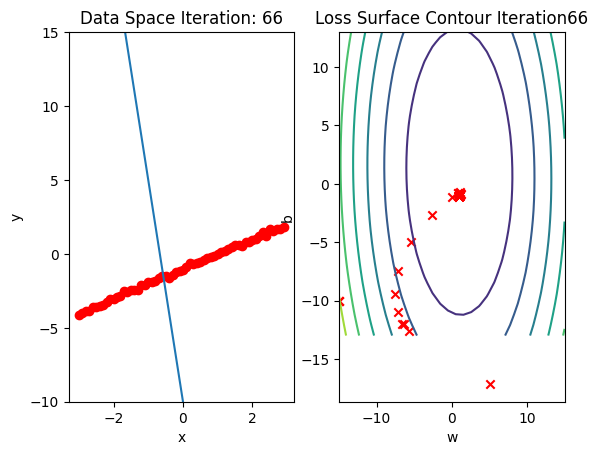

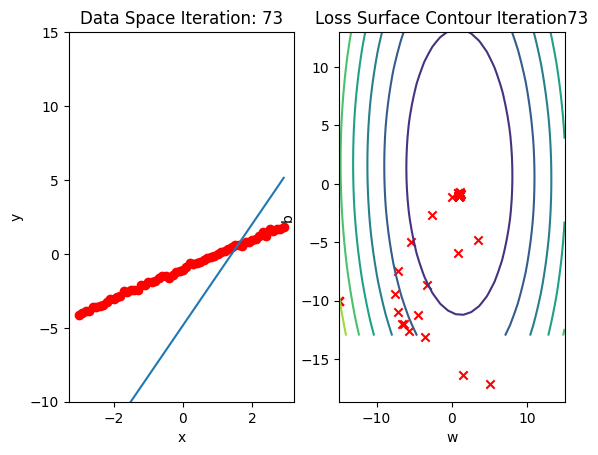

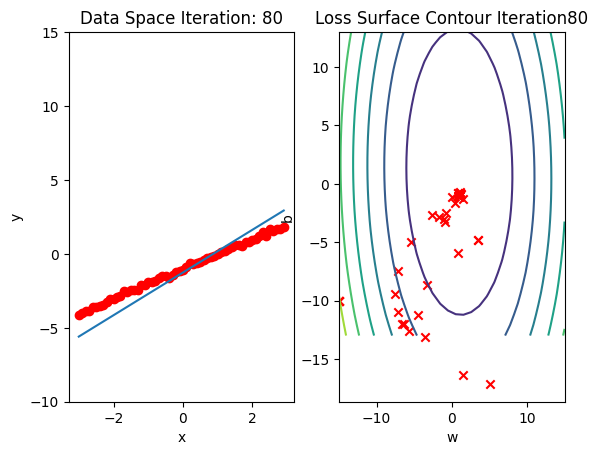

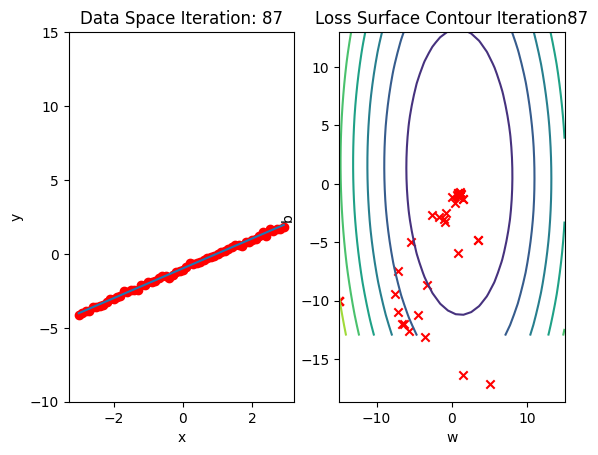

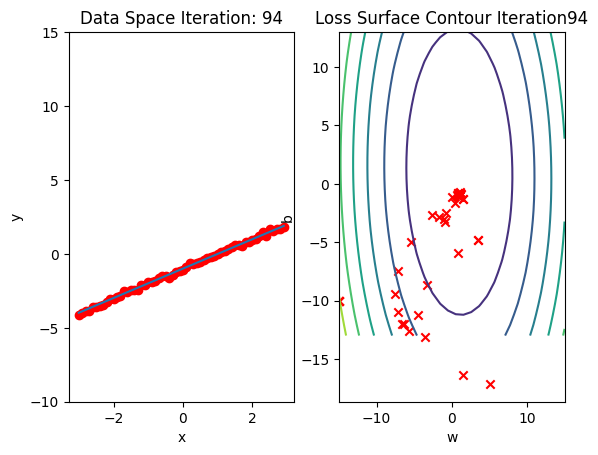

In [14]:
train_model_Mini10(5)

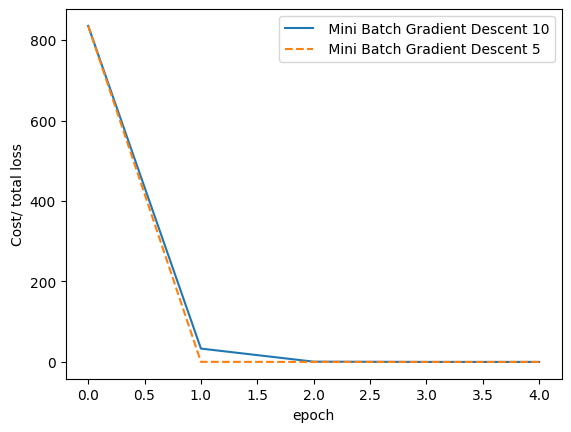

In [16]:
#Lets Compare the two batch sizes
#Plot out the LOSS_MINI10 and LOSS_MINI5


plt.plot(LOSS_MINI10,label = " Mini Batch Gradient Descent 10")
plt.plot(LOSS_MINI5, label = " Mini Batch Gradient Descent 5", linestyle='dashed')
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

# Simple LR 1D 1 Parameter

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Lets use this class for plotting and visualizing the parameter training
class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [19]:
#Lets generate some values that create a line with a slope of -3
X = torch.arange(-3, 3, 0.1).view(-1, 1) #View changes the shape of the tensor
f = -3 * X #Function of the line

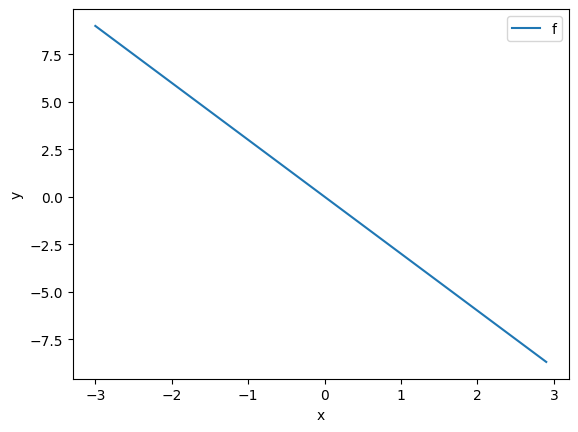

In [20]:
#Lets plot the line
plt.plot(X.numpy(), f.numpy(), label = 'f') #We need to convert tensor to numpy
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

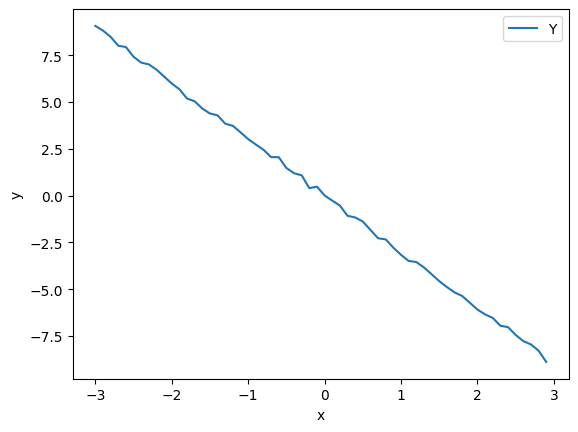

In [21]:
#Lets add noise to the data to simulate 'real data'. We use torch.randn to generate Gaussian noise.
Y = f + 0.1 * torch.randn(X.size()) #The noise must be the same size as X

#Lets plot Y
plt.plot(X.numpy(), Y.numpy(), label = 'Y') #We need to convert tensor to numpy
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [22]:
#Create the model and cost function(total loss)
#Create a forward function for prediction
def forward(x):
    return w * x

#Mean Squared Error function for evaluating the result
def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

#Create a learning rate
lr = 0.1

#Create an empty list to append loss results for each iteration
LOSS = []

#We create a parameter w with requires_grad = True to indicate that torch must learn it
w = torch.tensor(-10.0, requires_grad = True) #Initialize w as -10.0

#Create a plot diagram object to visualize the data and the parameter for each iteration
gradient_plot = plot_diagram(X, Y, w, stop = 5)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

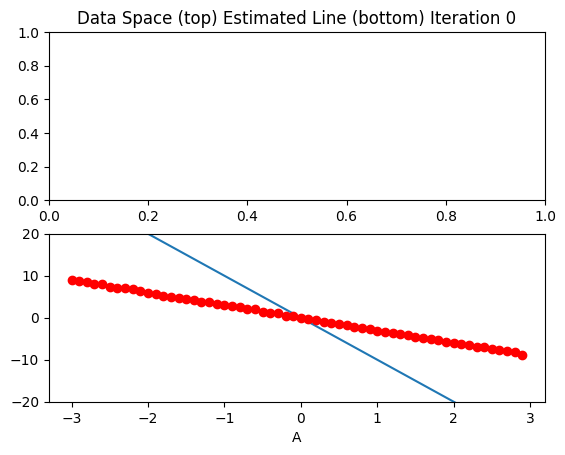

In [23]:
#Creating a function to train the model
def train_model(iter):
    for epoch in range (iter):
        
        #Prediction Yhat using forward function
        Yhat = forward(X)
        
        #loss calculation using criterion loss function on Yhat, Y
        loss = criterion(Yhat,Y)
        
        #Plotting diagram for visualization
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        #Appending Loss to LOSS list
        LOSS.append(loss.item())
        
        #Compute the gradient of the loss wrt all parameters
        loss.backward()
        
        #Update parameters
        w.data = w.data - lr * w.grad.data
        
        #Zero the gradients before running the backward pass
        w.grad.data.zero_()
        
#Lets train the model for 4 iterations
train_model(4)        

#Plotting the list LOSS (loss per iteration)        
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")        

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

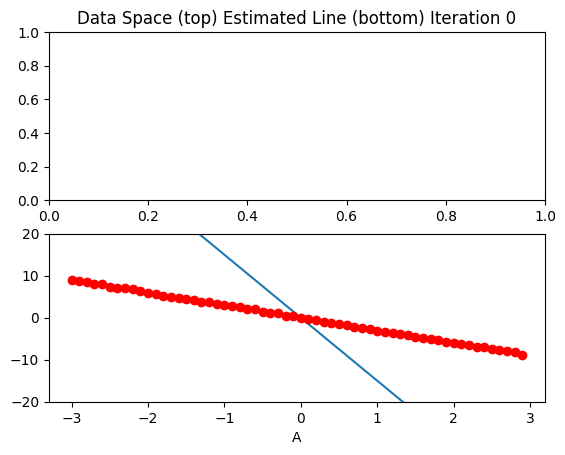

In [24]:
#Lets try a new parameter w
w = torch.tensor(-15.0, requires_grad=True) #Initialize w as -15.0

#Create an empty list to store the loss
LOSS2 = []
gradient_plot1 = plot_diagram(X, Y, w, stop = 15)


def my_train_model(iter):
    for epoch in range (iter):
        
        #Prediction Yhat using forward function
        Yhat = forward(X)
        
        #loss calculation using criterion loss function on Yhat, Y
        loss = criterion(Yhat,Y)
        
        #Plotting diagram for visualization
        gradient_plot1(Yhat, w, loss.item(), epoch)
        
        #Appending Loss to LOSS list
        LOSS2.append(loss.item())
        
        #Compute the gradient of the loss wrt all parameters
        loss.backward()
        
        #Update parameters
        w.data = w.data - lr * w.grad.data
        
        #Zero the gradients before running the backward pass
        w.grad.data.zero_()


my_train_model(4)

plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()

# 1D 2 Parameters

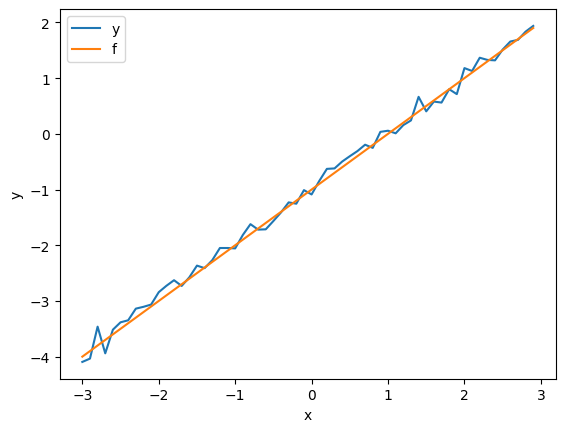

<Figure size 640x480 with 0 Axes>

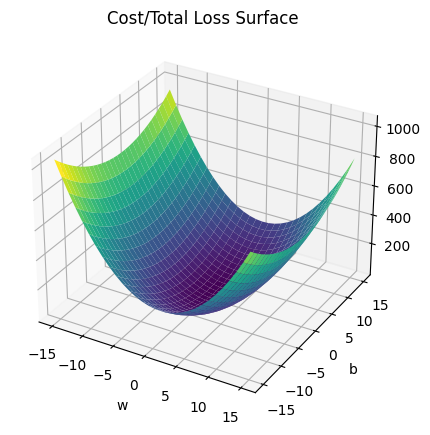

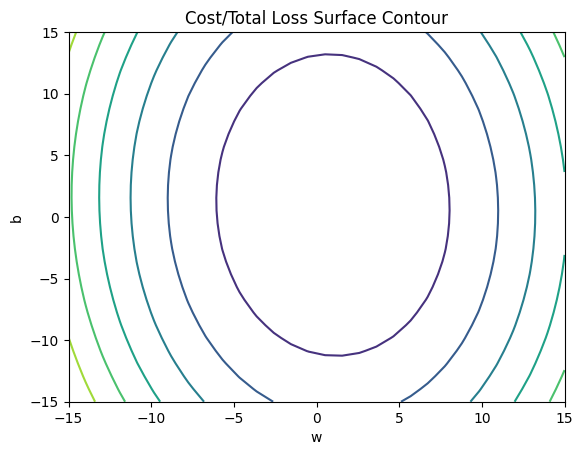

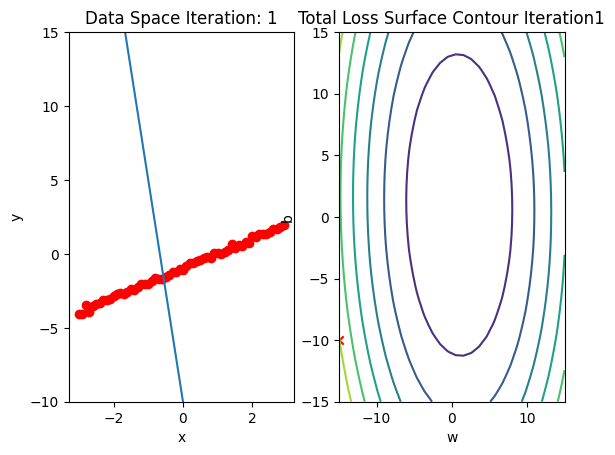

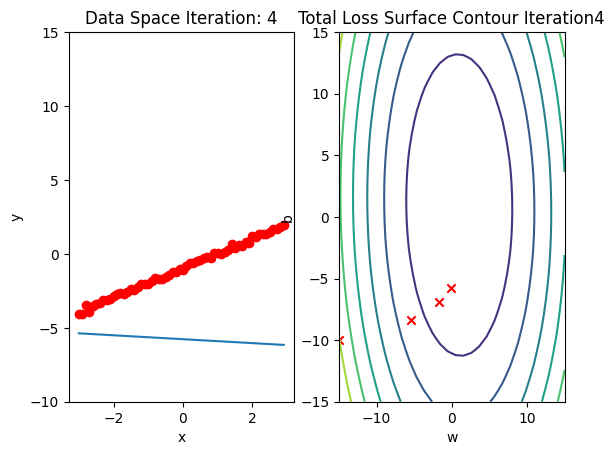

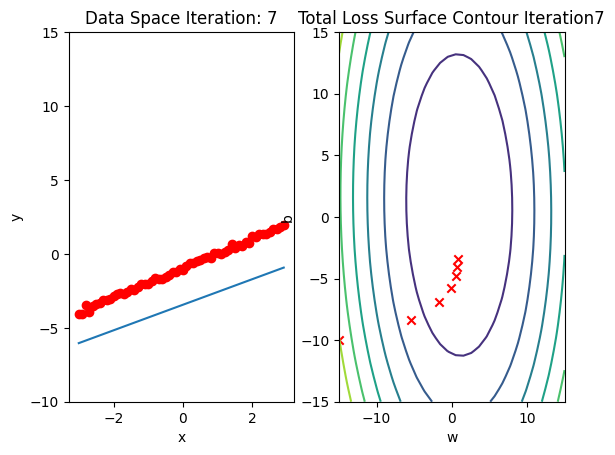

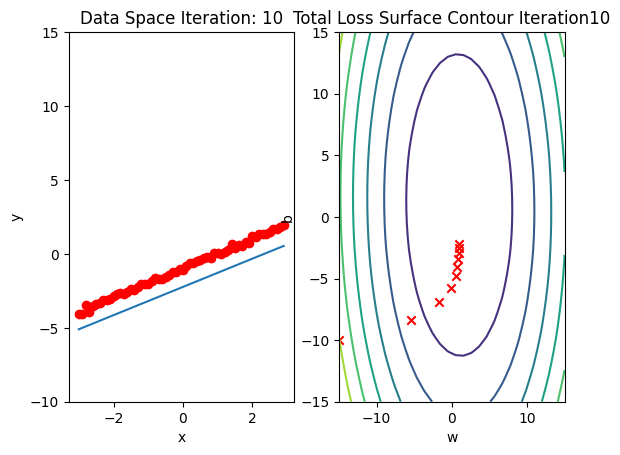

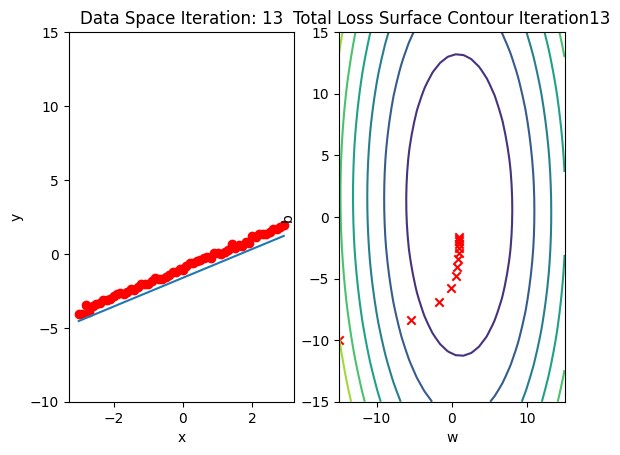

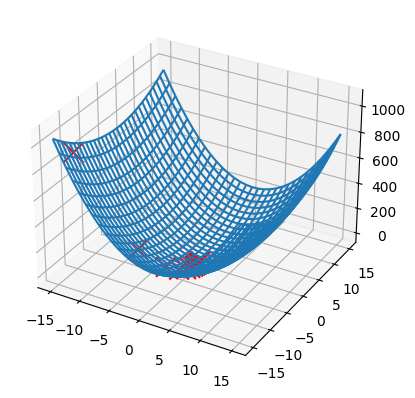

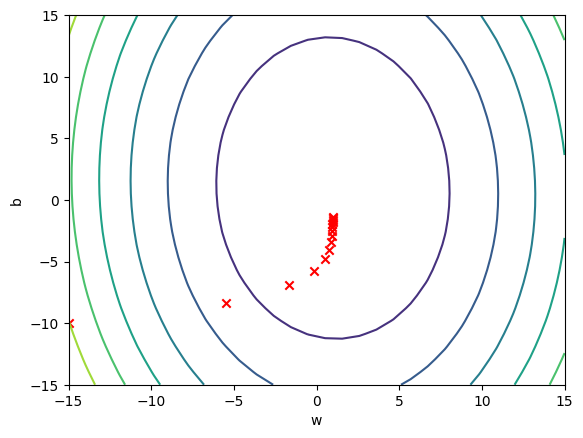

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

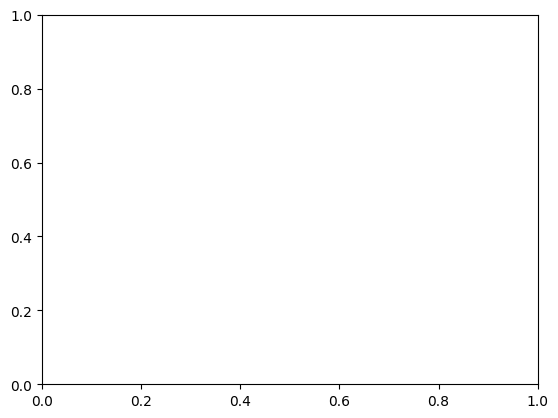

In [25]:

"""

Linear regression 1D: Training Two Parameter

"""

import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


class plot_error_surfaces(object): #This class will help visualize the data space and parameters during training. 
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        

#Create f(X) with a slope of 1 and a bias of -1
X = torch.arange(-3, 3, 0.1).view(-1, 1)
X.size()
f = 1 * X - 1


#Add noise
Y = f + 0.1 * torch.randn(X.size())


# Plot out the line and the points with noise
plt.plot(X.numpy(), Y.numpy(), label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#Define the forward function
def forward(x):
    return w * x + b

#Define the MSE Loss function
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)



#Create plot_error_surfaces for viewing the data
get_surface = plot_error_surfaces(15, 15, X, Y, 30)


#Define the parameters w, b for y = wx + b
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)


#Define learning rate and create an empty list for containing the loss for each iteration.
lr = 0.1
LOSS = []

# The function for training the model
def train_model(iter):
    
    #Loop
    for epoch in range(iter):
        
        #make a prediction
        Yhat = forward(X)
        
        #calculate the loss 
        loss = criterion(Yhat, Y)

        #Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        #store the loss in the list LOSS
        LOSS.append(loss)
        
        #backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        #update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        #zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()


#Train the model with 15 iterations
train_model(15)


#Plot out the Loss Result
get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

# Simple LR

In [26]:
"""

Simple Linear Regression 


"""

'''
Manual Method

'''
import torch
import torch.nn as nn

w = torch.tensor(2.0, requires_grad = True) #Slope tensor. req_grad = true because they need to be learnt
b = torch.tensor(-1.0, requires_grad = True) #Bias tensor. req_grad = true because they need to be learnt
def forward(x): #Function that will predict y with a given x
    y = w * x + b
    return y

x = torch.tensor([1.0])    
yhat = forward(x) #yhat is an estimate of the real value of y
print(yhat)

x = torch.tensor([[1],[2]]) #2D tensor x
yhat = forward(x)
print(yhat)

'''
Using torch.nn Linear
'''

#Lets try another method
from torch.nn import Linear

torch.manual_seed(1) #The seed for generating random numbers = 1
model = Linear(in_features = 1, out_features = 1)
x = torch.tensor([0.0])
yhat = model(x.float())
print(yhat)

#Lets see the model parameters
print(list(model.parameters()))

x = torch.tensor([[1.0],[2.0]])
yhat = model(x)
print(yhat)
print(list(model.parameters()))



'''
Custom class
'''

#Lets create a sublass Linear Regression LR within nn.Module
#We user super to call a method from nn.Module without needing to intitalize it
class LR(nn.Module): #LR is defined as a child class of nn.Module
    def __init__(self, in_size, out_size): #Constructor
        #Inheriting methods from parent class nn.Module
        super(LR,self).__init__()
        self.linear = nn.Linear(in_size, out_size)
    
    def forward(self, x): #Prediction funciton
        out = self.linear(x)
        return out

model = LR(1,1)

#We use state_dict to initialize the weight and bias of the model. 
#State_dict is a python dictionary. It can be used to map the relationship of linear layers to their parameters. 
model.state_dict()['linear.weight'].data[0] = torch.tensor([0.5153]) #Initializing weight
model.state_dict()['linear.bias'].data[0] = torch.tensor([-0.4414]) #initializing bias
print("The Parameters: ", list(model.parameters())) #Lets see the initialized weight and bias
#The above function works because the class LR, is a subclass of Modules. 

#Lets use the custom model to make predictions
x = torch.tensor([[1.0], [2.0]]) #2D tensor
print("The shape of x: ", x.shape)
yhat = model(x)
print(yhat)

x = torch.tensor([[1.0], [2.0], [3.0]])
print("The shape of x: ", x.shape)
print("The dimension of x: ", x.ndimension())
yhat = model(x)
print(yhat)


print("Python dictionary:", model.state_dict())
print("Keys:", model.state_dict().keys())
print("Values:", model.state_dict().values())

tensor([1.], grad_fn=<AddBackward0>)
tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)
tensor([-0.4414], grad_fn=<ViewBackward0>)
[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
The Parameters:  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
The shape of x:  torch.Size([2, 1])
tensor([[0.0739],
        [0.5892]], grad_fn=<AddmmBackward0>)
The shape of x:  torch.Size([3, 1])
The dimension of x:  2
tensor([[0.0739],
        [0.5892],
        [1.1045]], grad_fn=<AddmmBackward0>)
Python dictionary: OrderedDict([('linear.weight', tensor([[0.5153]])), ('linear.bias', tensor([-0.4414]))])
Keys: odict_keys(['linear.weight', 'linear.bias'])
Values: odict_val